# Python 備忘録
https://qiita.com/tanemaki/items/2ed05e258ef4c9e6caac

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### データ取得

In [2]:
df = pd.DataFrame({
    'city': ['osaka', 'osaka', 'osaka', 'osaka', 'tokyo', 'tokyo', 'tokyo'],
    'food': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})

In [3]:
df

,city,food,price,quantity
0,osaka,apple,100,1
1,osaka,orange,200,2
2,osaka,banana,250,3
3,osaka,banana,300,4
4,tokyo,apple,150,5
5,tokyo,apple,200,6
6,tokyo,banana,400,7


### value_counts()

In [4]:
# 各カラムの要素の数を取得
df["city"].value_counts()

osaka    4
tokyo    3
Name: city, dtype: int64

### groupby()

In [5]:
# 平均を取得
df_mean=df.groupby('city').mean().reset_index()
df_mean=df_mean.rename(columns={'price': 'price_mean', 'quantity': 'quantity_mean'})
df_mean

,city,price_mean,quantity_mean
0,osaka,212.5,2.5
1,tokyo,250.0,6.0


### merge()

In [6]:
# 平均をデータセットに結合
pd.merge(df, df_mean, on='city')

,city,food,price,quantity,price_mean,quantity_mean
0,osaka,apple,100,1,212.5,2.5
1,osaka,orange,200,2,212.5,2.5
2,osaka,banana,250,3,212.5,2.5
3,osaka,banana,300,4,212.5,2.5
4,tokyo,apple,150,5,250.0,6.0
5,tokyo,apple,200,6,250.0,6.0
6,tokyo,banana,400,7,250.0,6.0


### リスト内包表記

In [7]:
[i for i in range(10) if i%2==0]

[0, 2, 4, 6, 8]

### 欠損値を含む特徴量

In [8]:
for col in df.columns:
    null_num = df[col].isnull().sum()
    if null_num > 0:
        print(col+" : "+str(df[col].isnull().sum())+"("+str(df[col].dtype)+")")

### データ型

numpyの基本的な型
- 真偽値 (bool),
- (符号付き）整数 (int)
- 符号なし整数 (uint)
- 浮動小数点数 (float)
- 複素数 (complex)

データ型（bool型除く）は、それぞれ異なるサイズがある。  
たとえば、int型なら、

- numpy.int8
- numpy.int16
- numpy.int32
- numpy.int64

In [9]:
matrix=[
    ["int8", "-128 ～ 127",  "符号付き 8 ビット整数",  "1"],
    ["int16", "-32,768 ～ 32,767", "符号付き 16 ビット整数", "2"],
    ["int32",  "-2,147,483,648 ～ 2,147,483,647" , "符号付き 32 ビット整数", "4"],
    ["int64", "-9,223,372,036,854,775,808 ～ 9,223,372,036,854,775,807", "符号付き 64 ビット整数",  "8"]
]
pd.DataFrame(
    matrix,
    columns=["関数", "出力範囲", "出力タイプ", "要素あたりのバイト数"]
)

,関数,出力範囲,出力タイプ,要素あたりのバイト数
0,int8,-128 ～ 127,符号付き 8 ビット整数,1
1,int16,"-32,768 ～ 32,767",符号付き 16 ビット整数,2
2,int32,"-2,147,483,648 ～ 2,147,483,647",符号付き 32 ビット整数,4
3,int64,"-9,223,372,036,854,775,808 ～ 9,223,372,036,854...",符号付き 64 ビット整数,8


In [10]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [11]:
# 演算で型変更される
b=a*0.1
b.dtype

dtype('float64')

In [12]:
# 代入は型を変更しない
a[0]=5.5
a

array([5, 2, 3])

In [13]:
a.dtype

dtype('int64')

### プロットレイアウト

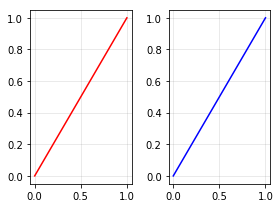

In [16]:
plt.figure(figsize=(4,3))
plt.subplot(1, 2, 1)
plt.plot([0, 1],[0, 1],color="red")
plt.grid(color='gray', alpha=0.2)
plt.subplot(1, 2, 2)
plt.plot([0, 1],[0, 1],color="blue")
plt.grid(color='gray', alpha=0.2)
plt.tight_layout()
plt.show()